#Laboratorio 2 de Optimizacion
Integrantes: Juan Aragón Amador, Daniel Castañeda Marriaga

DataSet Utilizado: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [ ]:
!pip install -q kaggle
!pip install -q kaggle-cli

In [ ]:
!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/kaggle.json" ~/.kaggle/
!cat ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

{"username":"juanjozr1","key":"4262d424cf6d65dd7a8d7af729497dbf"}

In [ ]:
!kaggle datasets download -d mirichoi0218/insurance

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 25.6MB/s]


In [ ]:
!unzip /content/insurance

Archive:  /content/insurance.zip
  inflating: insurance.csv           


##Punto 1:
Columnas

edad: edad del beneficiario principal

sexo: sexo del contratante del seguro, mujer, hombre

bmi: índice de masa corporal, que proporciona una comprensión del cuerpo, los pesos que son relativamente altos o bajos en relación con la altura,
índice objetivo de peso corporal (kg / m ^ 2) utilizando la relación entre la altura y el peso, idealmente 18,5 a 24,9

niños: Número de hijos cubiertos por el seguro de enfermedad / Número de personas a cargo

fumador: Fumador

región: la zona de residencia del beneficiario en los EE.UU., noreste, sureste, suroeste, noroeste.

gastos: Gastos médicos individuales facturados por el seguro de enfermedad

La cantidad de muestras es de 1338

In [ ]:
import pandas as pd

df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##Punto 2:


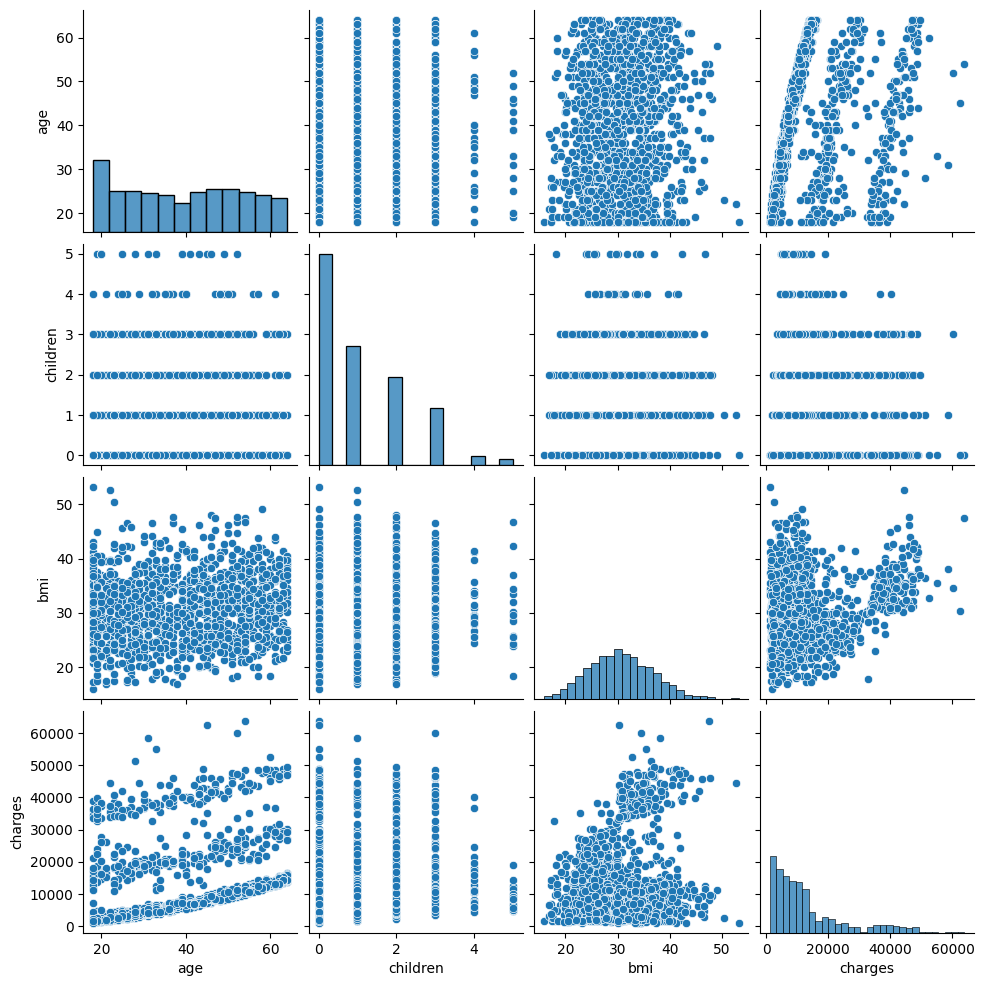

In [ ]:
# pd.plotting.scatter_matrix(df)
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar características
features = ['age', 'children', 'bmi']
sns.pairplot(df[features + ['charges']])
plt.show()

##Punto 3:

In [ ]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')


Number of rows and columns in the data set:  (1338, 7)



<ipython-input-75-bbd4db7504a7>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


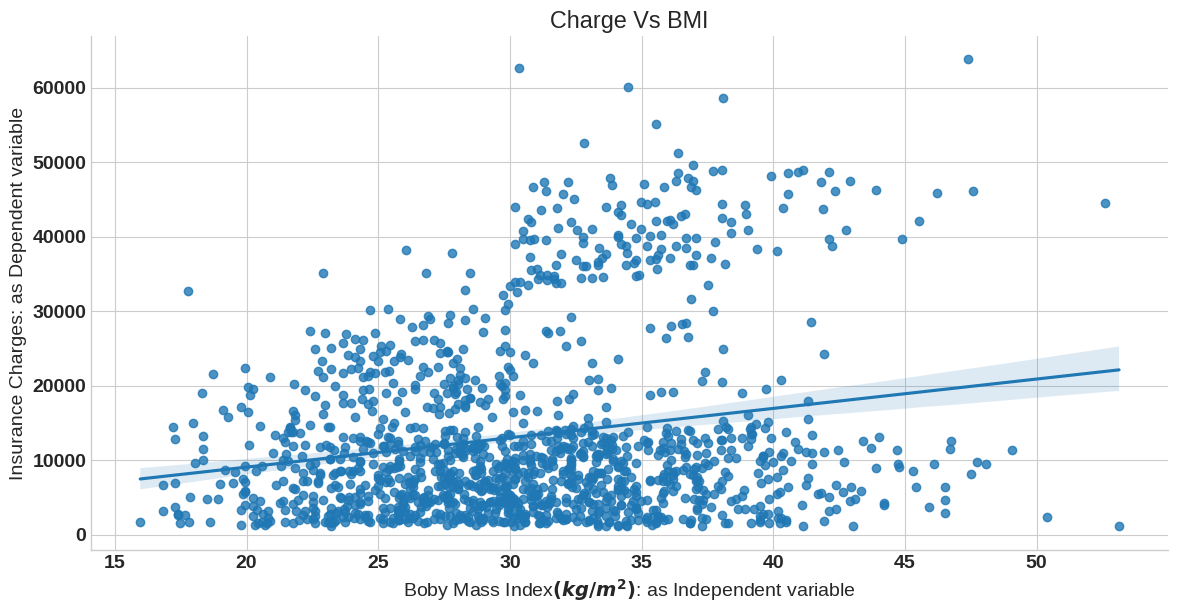

In [ ]:
sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

###3.1
Un conjunto de entrenamiento más grande mejora el desempeño del modelo, reflejándose en un MSE más bajo y un mejor R² en la división 70-30. Un conjunto de prueba más grande (50-50 o 40-60) verifica la generalización del modelo, pero reduce los datos de entrenamiento, lo que puede perjudicar el desempeño si hay pocos ejemplos. Las proporciones comunes, como 70-30, equilibran el aprendizaje y la evaluación. En datasets pequeños, se recomienda usar validación cruzada para maximizar la información disponible.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso


# Dividir el dataset en diferentes proporciones
X = df[['age', 'bmi', 'children']]  # Variables independientes
y = df['charges']  # Variable dependiente

print('División 70-30')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio y el R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
print('')





print('División 50-50')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio y el R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
print('')





print('División 40-60')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio y el R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

División 70-30
Mean Squared Error: 127399626.37416688
R2 Score: 0.13111524136803365

División 50-50
Mean Squared Error: 136443065.8881926
R2 Score: 0.12657910357777646

División 40-60
Mean Squared Error: 134919233.92871785
R2 Score: 0.12549017422694508


###3.2

Cambiar a SGD no mejoró significativamente el desempeño del modelo debido al tamaño del dataset. Ambos métodos convergen a soluciones similares, capturando bien los patrones. En datasets más grandes, SGD podría ofrecer ventajas en velocidad y escalabilidad.


In [ ]:
from sklearn.preprocessing import StandardScaler


# División de datos en proporciones 70-30, 50-50, 40-60
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X, y, test_size=0.5, random_state=42)
X_train_40, X_test_40, y_train_40, y_test_40 = train_test_split(X, y, test_size=0.6, random_state=42)




# Escalar los datos de entrada
scaler = StandardScaler()
X_train_70_scaled = scaler.fit_transform(X_train_70)
X_test_70_scaled = scaler.transform(X_test_70)

# Ajuste del modelo con SGD usando los datos escalados
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_model.fit(X_train_70_scaled, y_train_70)

# Predicción y evaluación
y_pred_sgd = sgd_model.predict(X_test_70_scaled)
print("SGD MSE:", mean_squared_error(y_test_70, y_pred_sgd))
print("SGD R2:", r2_score(y_test_70, y_pred_sgd))

SGD MSE: 127563583.42590427
SGD R2: 0.12999702942833402


###3.3

La regularización no afectó significativamente el rendimiento del modelo, lo que indica que el modelo estándar de regresión lineal ya estaba bien ajustado sin signos importantes de sobreajuste. Sin embargo, Ridge y Lasso son técnicas valiosas para garantizar la estabilidad del modelo, especialmente en datasets más grandes, con más características, o cuando se sospecha que algunas características pueden estar altamente correlacionadas o no ser útiles. Ajustar alpha podría ayudar a ver el verdadero impacto de la regularización.


In [ ]:
# Modelo Ridge (L2)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_70, y_train_70)
y_pred_ridge = ridge_model.predict(X_test_70)
print("Ridge MSE:", mean_squared_error(y_test_70, y_pred_ridge))
print("Ridge R2:", r2_score(y_test_70, y_pred_ridge))

# Modelo Lasso (L1)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_70, y_train_70)
y_pred_lasso = lasso_model.predict(X_test_70)
print("Lasso MSE:", mean_squared_error(y_test_70, y_pred_lasso))
print("Lasso R2:", r2_score(y_test_70, y_pred_lasso))

Ridge MSE: 127399181.68352742
Ridge R2: 0.1311182742255853
Lasso MSE: 127399563.45634833
Lasso R2: 0.13111567047709105


###3.4

Los coeficientes y la intercepción del modelo indican cómo las variables independientes afectan el costo del seguro. Los valores positivos sugieren que la edad, el índice de masa corporal (bmi) y el número de hijos están directamente relacionados con costos más altos. El impacto más notable proviene de la variable "children", seguida de "bmi" y luego "age". Estos hallazgos son útiles para que las aseguradoras comprendan los factores que influyen en la determinación de precios.


In [ ]:
# Entrenamiento con el modelo final
final_model = Ridge(alpha=1.0)  # Ajustar según tus resultados
final_model.fit(X_train_70, y_train_70)
print("Coeficientes:", final_model.coef_)
print("Intercepción:", final_model.intercept_)

Coeficientes: [229.03661046 335.54304885 641.21501755]
Intercepción: -6557.661905674402


###3.5

El alto valor de MSE y el bajo R² indican que el modelo de regresión lineal tiene un rendimiento predictivo deficiente. Las causas pueden incluir la elección inadecuada de características, alta variabilidad en los datos o relaciones no lineales no capturadas. En conclusión, el modelo actual no es suficiente para realizar predicciones precisas y se deben considerar otras opciones para optimizarlo.

In [ ]:
# Calcular MSE y R2 finales
y_pred_final = final_model.predict(X_test_70)
mse = mean_squared_error(y_test_70, y_pred_final)
r2 = r2_score(y_test_70, y_pred_final)
print("MSE Final:", mse)
print("R2 Final:", r2)

MSE Final: 127399181.68352742
R2 Final: 0.1311182742255853


##Punto 4

En general, el análisis del modelo de regresión lineal para predecir los costos de seguro médico mostró que, aunque se identificaron relaciones positivas entre las variables (age, bmi, y children) y el costo (charges), el rendimiento del modelo fue limitado. Se observó que usar una mayor proporción de datos para el entrenamiento (70-30) mejoraba el ajuste del modelo, logrando un MSE más bajo y un R² ligeramente mejor. Sin embargo, el cambio en el método de optimización a Stochastic Gradient Descent no ofreció ventajas significativas en este caso, aunque podría ser útil para conjuntos de datos más grandes debido a su eficiencia. La inclusión de técnicas de regularización como Ridge y Lasso tampoco mejoró sustancialmente el rendimiento, lo que sugiere que el modelo no presentaba problemas graves de sobreajuste con las características seleccionadas. Los coeficientes positivos indicaron que un mayor age, bmi, y el número de children se asociaban con mayores costos de seguro, siendo "children" la variable más influyente. Sin embargo, el alto MSE y el bajo R² reflejan que el modelo no captura bien la variabilidad en los datos, posiblemente debido a la presencia de relaciones no lineales o características importantes que no se incluyeron. En conclusión, aunque el modelo lineal proporciona una visión básica de los factores que influyen en los costos del seguro, no es adecuado para hacer predicciones precisas, y sería necesario explorar modelos más complejos y ajustes adicionales para optimizar el rendimiento predictivo.
